In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
from nltk.corpus import stopwords

# Removing stop words
stop_words = stopwords.words('english')

### Benign Texts (960 texts)

In [4]:
my_benign = []
f = open('21_ben_seq','r', encoding = "UTF-8")

for line in f:
    my_benign.append(line.strip())
len(my_benign)

1200

In [5]:
ben_tokenized = []
for sentence in my_benign:
    sentence = sentence.lower().split()
    ben_tokenized.append(sentence)

In [6]:
ben_tokenized_new = []
for line in ben_tokenized:
    line = [w for w in line if w not in stop_words]
    ben_tokenized_new.append(line)

In [7]:
len(ben_tokenized_new)

1200

In [8]:
import time

In [ ]:
ben_score = []
start = time.time()
for i in range(0,len(ben_tokenized_new)-1):
    for j in range(0,len(ben_tokenized_new)-1):
        if i != j:
            distance = word2vec.wmdistance(ben_tokenized_new[i], ben_tokenized_new[j])
            ben_score.append(distance)
            #print(f'Distance between sentence {i} and sentence {j} is: {distance}')
end = time.time()

In [ ]:
time1 = end - start
print(f"Runtime for Benign Distances is {time1/60} minutes i.e., {time1/3600} hours")

In [14]:
ben_score_new = []
import math
for i in ben_score:
    if i != math.inf:
        ben_score_new.append(i)
max(ben_score_new)

4.599524470285019

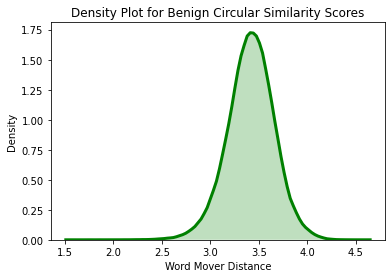

In [15]:
# Density Plot and Histogram of all benign scores

start = time.time()
sns.distplot(ben_score_new, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})
end = time.time()
plt.title('Density Plot for Benign Circular Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

time2 = end - start

In [17]:
print(f"Runtime for Plotting Benign Distances is {time2} seconds")

Runtime for Plotting Benign Distances is 3.21040678024292 seconds


Text(0, 0.5, 'Density')

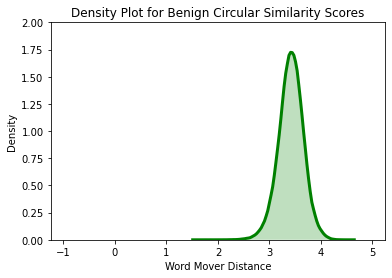

In [33]:
# Density Plot and Histogram of all benign scores

sns.distplot(ben_score_new, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-1.25, 5.25),ylim=(0, 2))

plt.title('Density Plot for Benign Circular Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

In [20]:
all_score = []
start = time.time()
for i in ben_score_new:
    all_score.append(i)
end = time.time()

time3 = end - start

In [21]:
print(f"Runtime for copying Benign Distances is {time3} seconds")

Runtime for copying Benign Distances is 0.08818578720092773 seconds


In [22]:
max(all_score)

4.599524470285019

In [23]:
len(all_score)

928332

In [24]:
start = time.time()

min_val = min(all_score)
max_val = max(all_score)
for i, val in enumerate(all_score):
    all_score[i] = (val-min_val) / (max_val - min_val)
end = time.time()

time4 = end - start

In [25]:
print(f"Runtime for normalizing Benign Distances is {time4} seconds")

Runtime for normalizing Benign Distances is 0.18593978881835938 seconds


In [26]:
len(all_score)

928332

In [27]:
max(all_score)

1.0

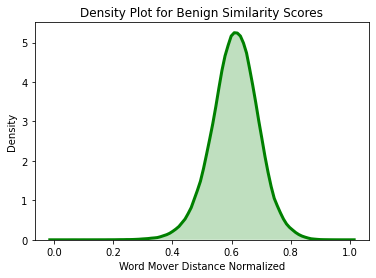

In [28]:
start = time.time()
sns.distplot(all_score, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})
end = time.time()
plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance Normalized')
plt.ylabel('Density')

time5 = end - start

In [30]:
print(f"Runtime for plotting normalized Benign Distances is {time5} seconds")

Runtime for plotting normalized Benign Distances is 3.2284443378448486 seconds


Text(0, 0.5, 'Density')

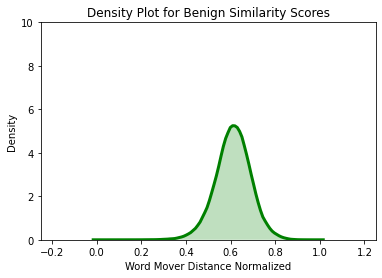

In [31]:
sns.distplot(all_score, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.25, 1.25),ylim=(0, 10))

plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance Normalized')
plt.ylabel('Density')

In [32]:
with open('11_ben100_circular_new_norm.txt', 'w') as f:
    for item in all_score:
        f.write("%s\n" % item)

In [ ]:
with open('trial_11_ben100_circular_new_norm.txt', 'w') as f:
    for item in ben_score:
        f.write("%s\n" % item)